# Exploratorio Boston Housing Data

In [12]:
# Librerías básicas para análisis de datos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos de la librería sklearn, la función train_test_split
from sklearn.model_selection import train_test_split
# Importamos la función StandardScaler para normalizar las variables (aunque no la usaremos en este ejemplo básico)
from sklearn.preprocessing import StandardScaler
# Importamos la función LinearRegression de la librería sklearn para inicializar el modelo
from sklearn.linear_model import LinearRegression

# Configuración para mejorar la visualización de gráficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)

# Importación de datos

In [13]:
dataset = pd.read_csv('../data/BostonHousing.csv')

# Análisis Exploratorio de Datos

En esta sección vamos a explorar el dataset para entender mejor su estructura, las variables que contiene y sus características principales.

## 1. Información básica del dataset

In [14]:
# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
print(dataset.head())

print("\n" + "="*50)

# Información general del dataset
print("\nInformación general del dataset:")
print(dataset.info())

print("\n" + "="*50)

# Dimensiones del dataset
print(f"\nDimensiones del dataset: {dataset.shape}")
print(f"Número de filas: {dataset.shape[0]}")
print(f"Número de columnas: {dataset.shape[1]}")

print("\n" + "="*50)

# Nombres de las columnas
print("\nNombres de las columnas:")
print(dataset.columns.tolist())

Primeras 5 filas del dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS

## 2. Descripción de las variables

In [15]:
# Descripción detallada de las variables del dataset Boston Housing
variables_info = {
    'CRIM': 'Tasa de criminalidad per cápita por ciudad',
    'ZN': 'Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados',
    'INDUS': 'Proporción de acres de negocios no minoristas por ciudad',
    'CHAS': 'Variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario)',
    'NOX': 'Concentración de óxidos de nitrógeno (partes por 10 millones)',
    'RM': 'Número promedio de habitaciones por vivienda',
    'AGE': 'Proporción de unidades ocupadas por sus propietarios construidas antes de 1940',
    'DIS': 'Distancias ponderadas a cinco centros de empleo de Boston',
    'RAD': 'Índice de accesibilidad a las autopistas radiales',
    'TAX': 'Tasa de impuesto a la propiedad de valor completo por $10,000',
    'PTRATIO': 'Relación alumno-maestro por ciudad',
    'B': '1000(Bk - 0.63)^2 donde Bk es la proporción de afroamericanos por ciudad',
    'LSTAT': 'Porcentaje de estado socioeconómico más bajo de la población',
    'MEDV': 'Valor mediano de las viviendas ocupadas por sus propietarios en $1000s (VARIABLE OBJETIVO)'
}

print("DICCIONARIO DE VARIABLES - BOSTON HOUSING DATASET")
print("=" * 80)
for var, descripcion in variables_info.items():
    print(f"{var:8} : {descripcion}")

print("\n" + "=" * 80)
print("CLASIFICACIÓN DE VARIABLES:")
print("\nVariables continuas (11):")
continuas = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(", ".join(continuas))

print("\nVariables discretas/categóricas (3):")
discretas = ['CHAS', 'RAD', 'TAX']
print(", ".join(discretas))

print(f"\nVariable objetivo: MEDV (Valor mediano de viviendas)")
print(f"Total de predictores potenciales: {len(dataset.columns) - 1}")

DICCIONARIO DE VARIABLES - BOSTON HOUSING DATASET
CRIM     : Tasa de criminalidad per cápita por ciudad
ZN       : Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados
INDUS    : Proporción de acres de negocios no minoristas por ciudad
CHAS     : Variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario)
NOX      : Concentración de óxidos de nitrógeno (partes por 10 millones)
RM       : Número promedio de habitaciones por vivienda
AGE      : Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
DIS      : Distancias ponderadas a cinco centros de empleo de Boston
RAD      : Índice de accesibilidad a las autopistas radiales
TAX      : Tasa de impuesto a la propiedad de valor completo por $10,000
PTRATIO  : Relación alumno-maestro por ciudad
B        : 1000(Bk - 0.63)^2 donde Bk es la proporción de afroamericanos por ciudad
LSTAT    : Porcentaje de estado socioeconómico más bajo de la població

## 3. Estadísticas descriptivas

In [16]:
# Estadísticas descriptivas del dataset
print("ESTADÍSTICAS DESCRIPTIVAS COMPLETAS")
print("=" * 80)
print(dataset.describe().round(3))

print("\n" + "=" * 80)
print("ANÁLISIS DE LA VARIABLE OBJETIVO (MEDV)")
print("=" * 80)
medv_stats = dataset['MEDV']
print(f"Media: ${medv_stats.mean():.2f}k")
print(f"Mediana: ${medv_stats.median():.2f}k")
print(f"Desviación estándar: ${medv_stats.std():.2f}k")
print(f"Mínimo: ${medv_stats.min():.2f}k")
print(f"Máximo: ${medv_stats.max():.2f}k")
print(f"Rango: ${medv_stats.max() - medv_stats.min():.2f}k")
print(f"Coeficiente de variación: {(medv_stats.std()/medv_stats.mean())*100:.1f}%")

print("\n" + "=" * 80)
print("VARIABLES CON MAYOR VARIABILIDAD (CV > 50%)")
print("=" * 80)
for col in dataset.columns:
    if dataset[col].std() != 0:  # Evitar división por cero
        cv = (dataset[col].std() / dataset[col].mean()) * 100
        if cv > 50:
            print(f"{col:8}: CV = {cv:.1f}% (Alta variabilidad)")

print("\n" + "=" * 80)
print("RESUMEN POR CUARTILES - VARIABLES CLAVE")
print("=" * 80)
variables_clave = ['RM', 'LSTAT', 'PTRATIO', 'CRIM', 'MEDV']
for var in variables_clave:
    q1, q2, q3 = dataset[var].quantile([0.25, 0.5, 0.75])
    print(f"{var:8}: Q1={q1:.2f}, Q2={q2:.2f}, Q3={q3:.2f}")

ESTADÍSTICAS DESCRIPTIVAS COMPLETAS
          CRIM       ZN    INDUS     CHAS      NOX       RM      AGE      DIS  \
count  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000   
mean     3.614   11.364   11.137    0.069    0.555    6.285   68.575    3.795   
std      8.602   23.322    6.860    0.254    0.116    0.703   28.149    2.106   
min      0.006    0.000    0.460    0.000    0.385    3.561    2.900    1.130   
25%      0.082    0.000    5.190    0.000    0.449    5.885   45.025    2.100   
50%      0.257    0.000    9.690    0.000    0.538    6.208   77.500    3.207   
75%      3.677   12.500   18.100    0.000    0.624    6.624   94.075    5.188   
max     88.976  100.000   27.740    1.000    0.871    8.780  100.000   12.126   

           RAD      TAX  PTRATIO        B    LSTAT     MEDV  
count  506.000  506.000  506.000  506.000  506.000  506.000  
mean     9.549  408.237   18.456  356.674   12.653   22.533  
std      8.707  168.537    2.165   91.295    7.1

## 4. Verificación de calidad de datos

In [17]:
# Verificación de calidad de datos
print("VERIFICACIÓN DE CALIDAD DE DATOS")
print("=" * 60)

# Valores faltantes
print("1. VALORES FALTANTES:")
missing_values = dataset.isnull().sum()
print(f"Total de valores faltantes: {missing_values.sum()}")
if missing_values.sum() == 0:
    print("✅ No hay valores faltantes en el dataset")
else:
    print("Variables con valores faltantes:")
    for var, count in missing_values[missing_values > 0].items():
        print(f"  {var}: {count} ({count/len(dataset)*100:.1f}%)")

print("\n2. VALORES DUPLICADOS:")
duplicados = dataset.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")
if duplicados == 0:
    print("✅ No hay filas duplicadas")

print("\n3. TIPOS DE DATOS:")
print(dataset.dtypes.value_counts())

print("\n4. VALORES ÚNICOS POR VARIABLE:")
for col in dataset.columns:
    unique_count = dataset[col].nunique()
    total_count = len(dataset)
    print(f"{col:8}: {unique_count:4d} valores únicos ({unique_count/total_count*100:.1f}%)")

print("\n5. VERIFICACIÓN DE RANGOS:")
# Verificar si hay valores negativos donde no deberían
variables_positivas = ['RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'MEDV']
for var in variables_positivas:
    if var in dataset.columns:
        min_val = dataset[var].min()
        if min_val < 0:
            print(f"⚠️  {var}: Tiene valores negativos (min: {min_val})")
        else:
            print(f"✅ {var}: Rango apropiado (min: {min_val:.2f})")

print("\n6. VARIABLE BINARIA CHAS:")
chas_counts = dataset['CHAS'].value_counts()
print(f"CHAS = 0 (no río): {chas_counts[0]} ({chas_counts[0]/len(dataset)*100:.1f}%)")
print(f"CHAS = 1 (río): {chas_counts[1]} ({chas_counts[1]/len(dataset)*100:.1f}%)")

VERIFICACIÓN DE CALIDAD DE DATOS
1. VALORES FALTANTES:
Total de valores faltantes: 0
✅ No hay valores faltantes en el dataset

2. VALORES DUPLICADOS:
Filas duplicadas: 0
✅ No hay filas duplicadas

3. TIPOS DE DATOS:
float64    11
int64       3
Name: count, dtype: int64

4. VALORES ÚNICOS POR VARIABLE:
CRIM    :  504 valores únicos (99.6%)
ZN      :   26 valores únicos (5.1%)
INDUS   :   76 valores únicos (15.0%)
CHAS    :    2 valores únicos (0.4%)
NOX     :   81 valores únicos (16.0%)
RM      :  446 valores únicos (88.1%)
AGE     :  356 valores únicos (70.4%)
DIS     :  412 valores únicos (81.4%)
RAD     :    9 valores únicos (1.8%)
TAX     :   66 valores únicos (13.0%)
PTRATIO :   46 valores únicos (9.1%)
B       :  357 valores únicos (70.6%)
LSTAT   :  455 valores únicos (89.9%)
MEDV    :  229 valores únicos (45.3%)

5. VERIFICACIÓN DE RANGOS:
✅ RM: Rango apropiado (min: 3.56)
✅ AGE: Rango apropiado (min: 2.90)
✅ DIS: Rango apropiado (min: 1.13)
✅ TAX: Rango apropiado (min: 187.00)


## 5. Análisis de correlaciones

CORRELACIONES CON MEDV (VARIABLE OBJETIVO)
Variables más correlacionadas con el precio de viviendas:
RM      :   0.695 - Correlación muy fuerte positiva ⭐⭐⭐
ZN      :   0.360 - Correlación fuerte positiva ⭐⭐
B       :   0.333 - Correlación fuerte positiva ⭐⭐
DIS     :   0.250 - Correlación moderada positiva ⭐
CHAS    :   0.175 - Correlación moderada positiva ⭐
AGE     :  -0.377 - Correlación fuerte negativa ⭐⭐
RAD     :  -0.382 - Correlación fuerte negativa ⭐⭐
CRIM    :  -0.388 - Correlación fuerte negativa ⭐⭐
NOX     :  -0.427 - Correlación fuerte negativa ⭐⭐
TAX     :  -0.469 - Correlación fuerte negativa ⭐⭐
INDUS   :  -0.484 - Correlación fuerte negativa ⭐⭐
PTRATIO :  -0.508 - Correlación muy fuerte negativa ⭐⭐⭐
LSTAT   :  -0.738 - Correlación muy fuerte negativa ⭐⭐⭐


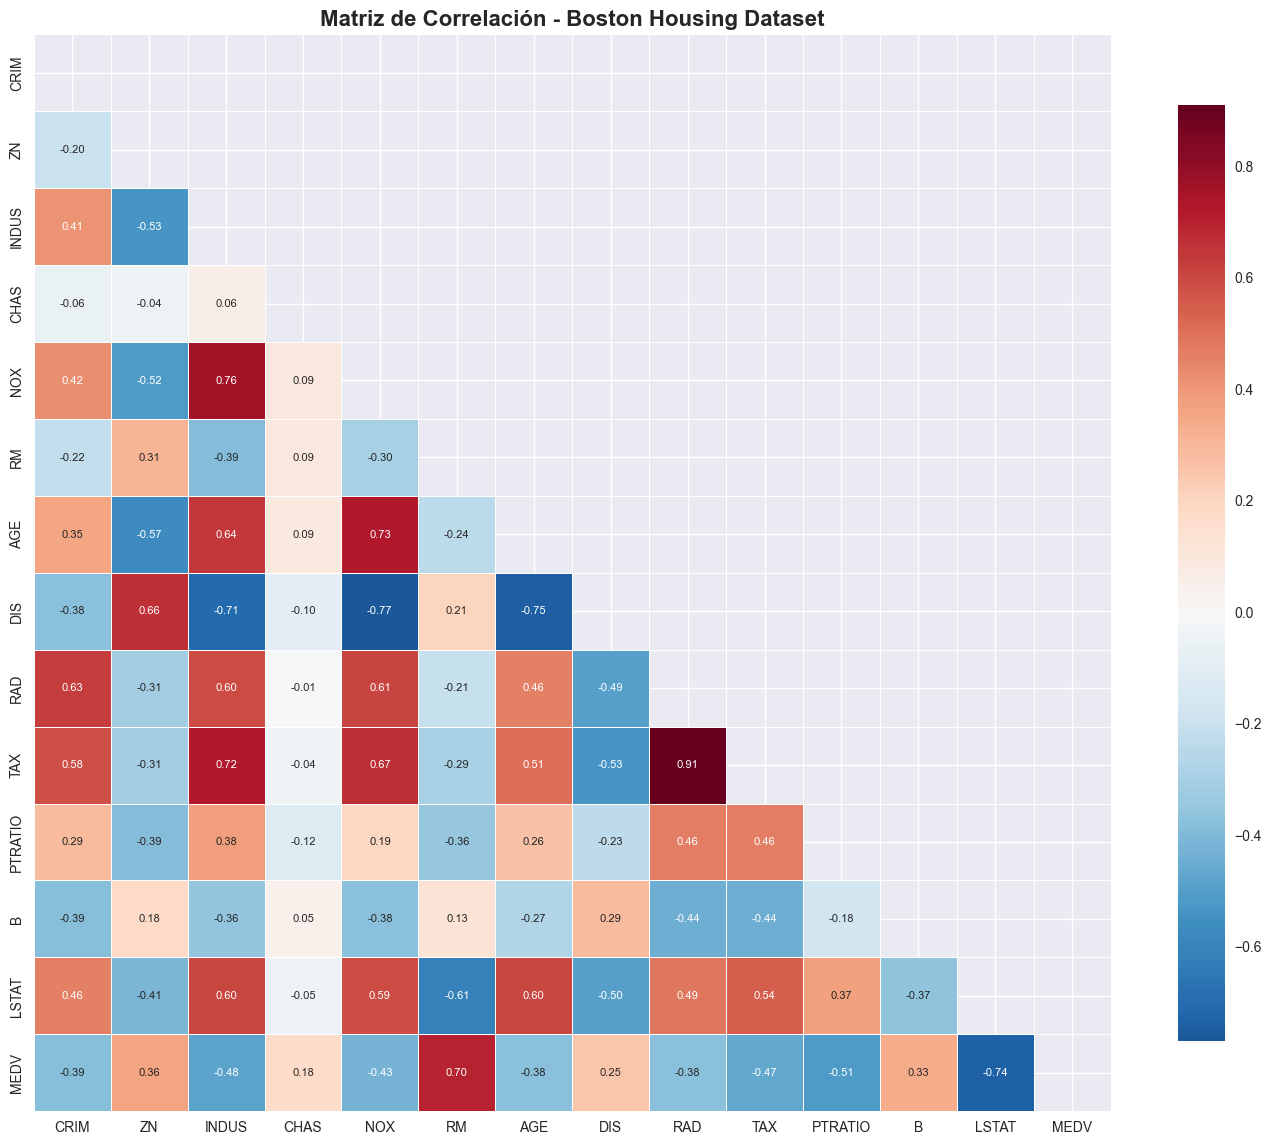


TOP 5 PREDICTORES POTENCIALES:
1. RM: 0.695
2. ZN: 0.360
3. B: 0.333
4. DIS: 0.250
5. CHAS: 0.175

TOP 5 CORRELACIONES NEGATIVAS:
1. NOX: -0.427
2. TAX: -0.469
3. INDUS: -0.484
4. PTRATIO: -0.508
5. LSTAT: -0.738


In [18]:
# Análisis de correlaciones
import seaborn as sns

# Calcular matriz de correlación
correlation_matrix = dataset.corr()

# Correlaciones con MEDV (variable objetivo)
correlations_medv = correlation_matrix['MEDV'].sort_values(ascending=False)

print("CORRELACIONES CON MEDV (VARIABLE OBJETIVO)")
print("=" * 60)
print("Variables más correlacionadas con el precio de viviendas:")
for var, corr in correlations_medv.items():
    if var != 'MEDV':
        if abs(corr) > 0.5:
            fuerza = "muy fuerte"
            emoji = "⭐⭐⭐"
        elif abs(corr) > 0.3:
            fuerza = "fuerte"
            emoji = "⭐⭐"
        elif abs(corr) > 0.1:
            fuerza = "moderada"
            emoji = "⭐"
        else:
            fuerza = "débil"
            emoji = ""
        
        direccion = "positiva" if corr > 0 else "negativa"
        print(f"{var:8}: {corr:7.3f} - Correlación {fuerza} {direccion} {emoji}")

# Crear heatmap de correlación
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8}, 
            linewidths=0.5, annot_kws={"size": 8})
plt.title('Matriz de Correlación - Boston Housing Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("TOP 5 PREDICTORES POTENCIALES:")
top_predictors = correlations_medv.drop('MEDV').head(5)
for i, (var, corr) in enumerate(top_predictors.items(), 1):
    print(f"{i}. {var}: {corr:.3f}")

print("\nTOP 5 CORRELACIONES NEGATIVAS:")
negative_corrs = correlations_medv.drop('MEDV').tail(5)
for i, (var, corr) in enumerate(negative_corrs.items(), 1):
    print(f"{i}. {var}: {corr:.3f}")

## 6. Visualizaciones exploratorias

### 6.1 Gráficos de dispersión - Variables más correlacionadas

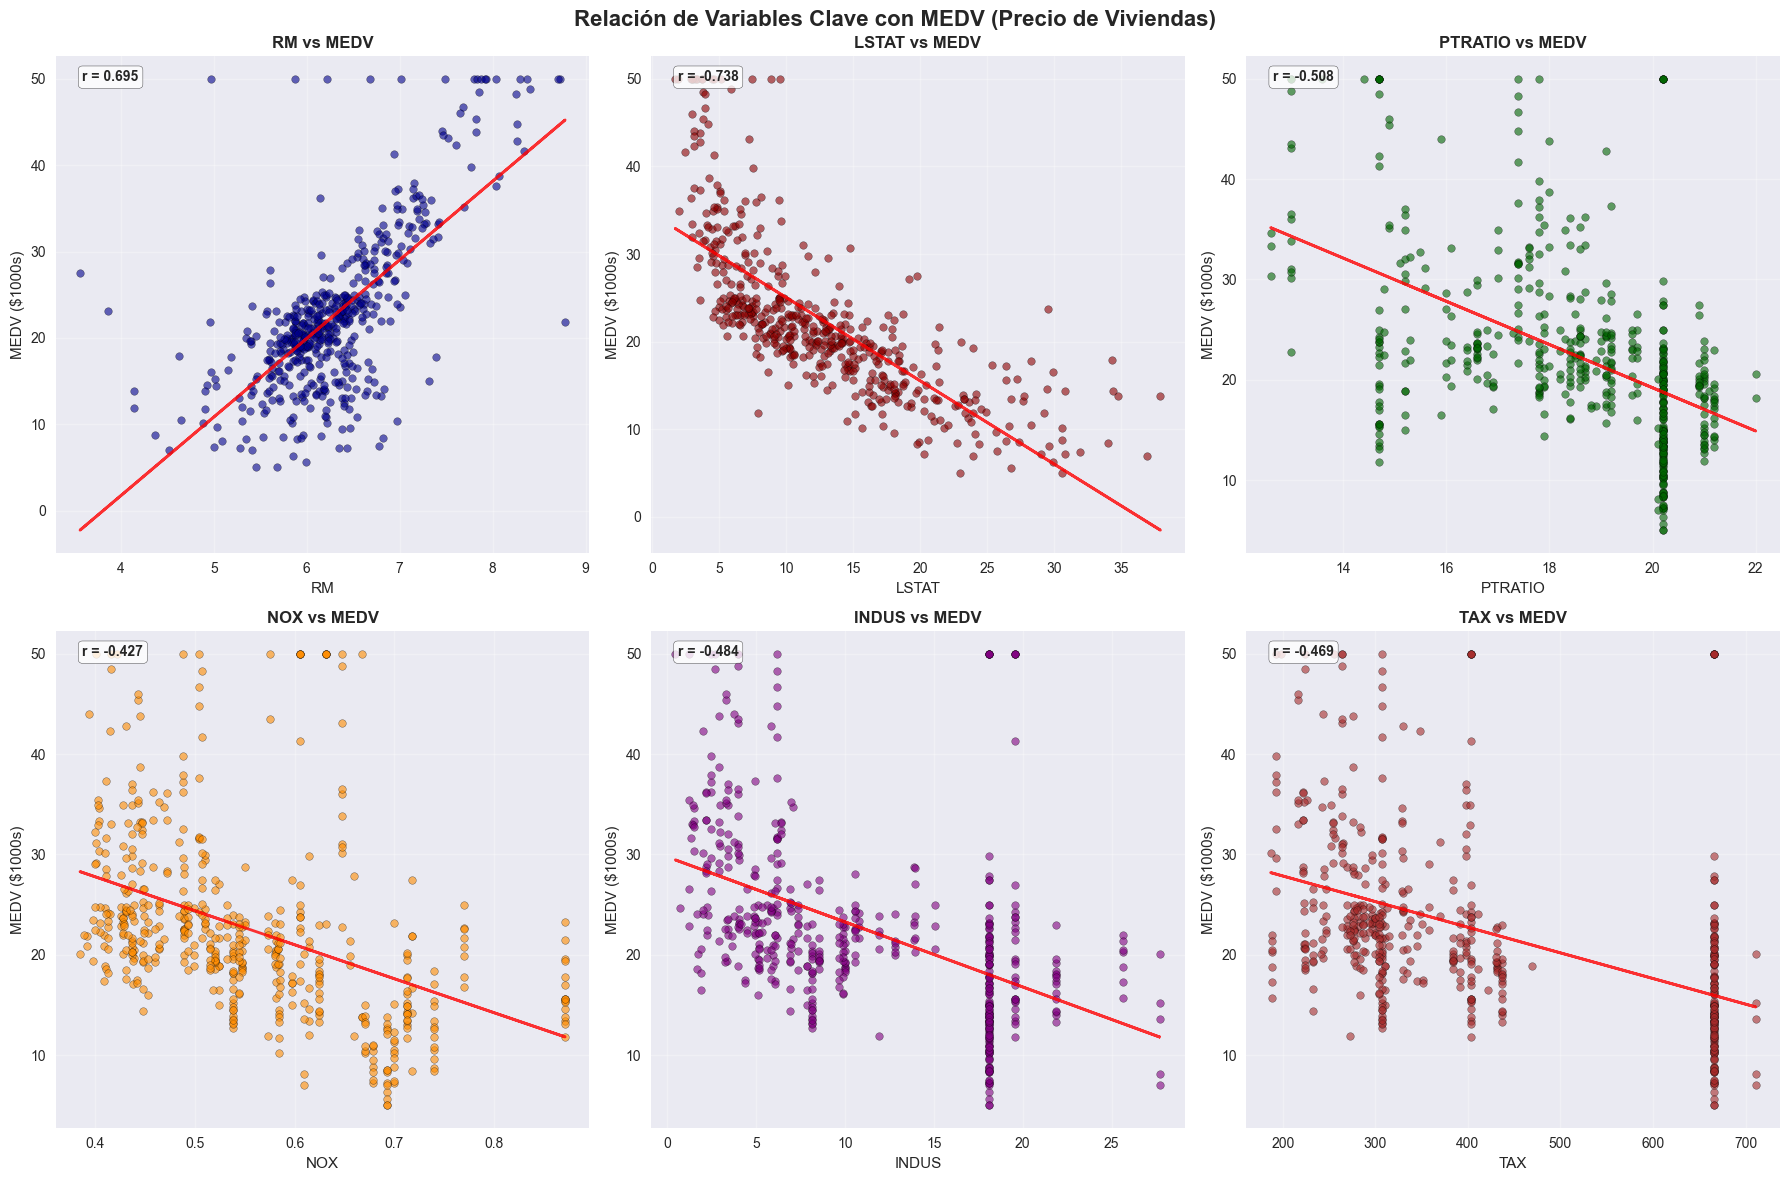

INSIGHTS DE LAS RELACIONES:
1. RM (Habitaciones): Correlación positiva fuerte (r=0.695)
   → Más habitaciones = Mayor precio

2. LSTAT (% Población bajo estatus): Correlación negativa muy fuerte (r=-0.738)
   → Mayor pobreza = Menor precio

3. PTRATIO (Ratio estudiante-maestro): Correlación negativa fuerte (r=-0.508)
   → Peor educación = Menor precio

4. NOX (Contaminación): Correlación negativa moderada (r=-0.427)
   → Mayor contaminación = Menor precio

5. INDUS (% Industrial): Correlación negativa moderada (r=-0.484)
   → Más industria = Menor precio

6. TAX (Impuestos): Correlación negativa moderada (r=-0.469)
   → Mayores impuestos = Menor precio


In [19]:
# Gráficos de dispersión para las variables más correlacionadas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Relación de Variables Clave con MEDV (Precio de Viviendas)', fontsize=16, fontweight='bold')

# Variables más importantes
top_vars = ['RM', 'LSTAT', 'PTRATIO', 'NOX', 'INDUS', 'TAX']
colors = ['darkblue', 'darkred', 'darkgreen', 'darkorange', 'purple', 'brown']

for i, var in enumerate(top_vars):
    row = i // 3
    col = i % 3
    
    # Gráfico de dispersión
    axes[row, col].scatter(dataset[var], dataset['MEDV'], 
                          alpha=0.6, s=30, color=colors[i], 
                          edgecolors='black', linewidth=0.3)
    
    # Línea de tendencia
    z = np.polyfit(dataset[var], dataset['MEDV'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(dataset[var], p(dataset[var]), 
                       "red", alpha=0.8, linewidth=2)
    
    axes[row, col].set_title(f'{var} vs MEDV', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('MEDV ($1000s)')
    axes[row, col].grid(True, alpha=0.3)
    
    # Mostrar correlación
    corr = dataset[var].corr(dataset['MEDV'])
    axes[row, col].text(0.05, 0.95, f'r = {corr:.3f}', 
                       transform=axes[row, col].transAxes,
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                       fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Resumen de insights
print("INSIGHTS DE LAS RELACIONES:")
print("=" * 50)
print("1. RM (Habitaciones): Correlación positiva fuerte (r=0.695)")
print("   → Más habitaciones = Mayor precio")
print("\n2. LSTAT (% Población bajo estatus): Correlación negativa muy fuerte (r=-0.738)")
print("   → Mayor pobreza = Menor precio")
print("\n3. PTRATIO (Ratio estudiante-maestro): Correlación negativa fuerte (r=-0.508)")
print("   → Peor educación = Menor precio")
print("\n4. NOX (Contaminación): Correlación negativa moderada (r=-0.427)")
print("   → Mayor contaminación = Menor precio")
print("\n5. INDUS (% Industrial): Correlación negativa moderada (r=-0.484)")
print("   → Más industria = Menor precio")
print("\n6. TAX (Impuestos): Correlación negativa moderada (r=-0.469)")
print("   → Mayores impuestos = Menor precio")

### 6.2 Distribución de la variable objetivo (MEDV)

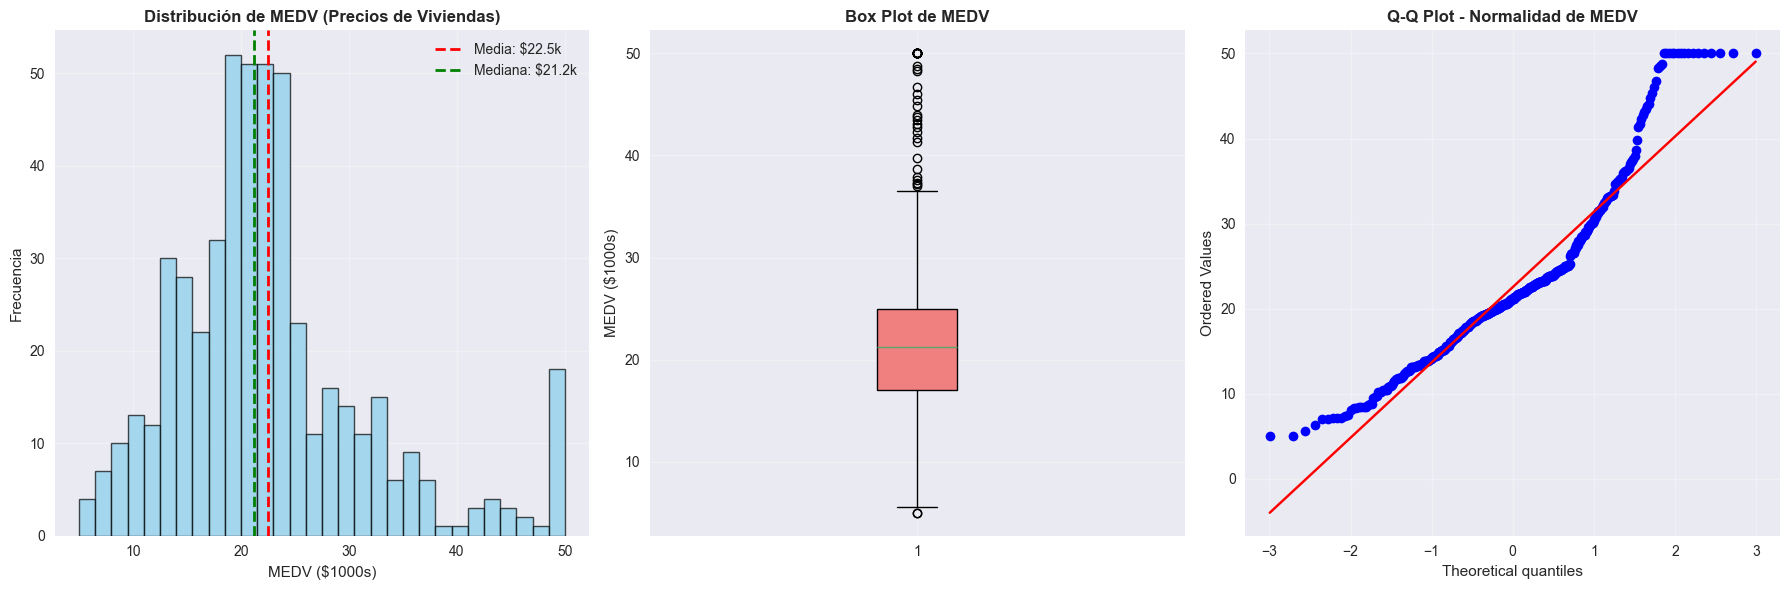

ANÁLISIS DE DISTRIBUCIÓN DE MEDV
Media: $22.53k
Mediana: $21.20k
Desviación estándar: $9.20k
Asimetría: 1.108
Curtosis: 1.495

Interpretación: Distribución ligeramente sesgada hacia la derecha

Rango de precios:
Mínimo: $5.0k
Máximo: $50.0k
Rango: $45.0k

Percentiles:
P10: $12.8k
P25: $17.0k
P50: $21.2k
P75: $25.0k
P90: $34.8k


In [20]:
# Análisis de la distribución de MEDV
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma
axes[0].hist(dataset['MEDV'], bins=30, alpha=0.7, color='skyblue', 
             edgecolor='black', linewidth=1)
axes[0].set_title('Distribución de MEDV (Precios de Viviendas)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('MEDV ($1000s)')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, alpha=0.3)

# Añadir estadísticas
mean_medv = dataset['MEDV'].mean()
median_medv = dataset['MEDV'].median()
axes[0].axvline(mean_medv, color='red', linestyle='--', linewidth=2, label=f'Media: ${mean_medv:.1f}k')
axes[0].axvline(median_medv, color='green', linestyle='--', linewidth=2, label=f'Mediana: ${median_medv:.1f}k')
axes[0].legend()

# Box plot
box = axes[1].boxplot(dataset['MEDV'], patch_artist=True)
box['boxes'][0].set_facecolor('lightcoral')
axes[1].set_title('Box Plot de MEDV', fontsize=12, fontweight='bold')
axes[1].set_ylabel('MEDV ($1000s)')
axes[1].grid(True, alpha=0.3)

# Q-Q plot para normalidad
from scipy import stats
stats.probplot(dataset['MEDV'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot - Normalidad de MEDV', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis estadístico de la distribución
print("ANÁLISIS DE DISTRIBUCIÓN DE MEDV")
print("=" * 50)
print(f"Media: ${dataset['MEDV'].mean():.2f}k")
print(f"Mediana: ${dataset['MEDV'].median():.2f}k")
print(f"Desviación estándar: ${dataset['MEDV'].std():.2f}k")
print(f"Asimetría: {dataset['MEDV'].skew():.3f}")
print(f"Curtosis: {dataset['MEDV'].kurtosis():.3f}")

# Interpretación de asimetría
skewness = dataset['MEDV'].skew()
if abs(skewness) < 0.5:
    skew_interpretation = "aproximadamente simétrica"
elif skewness > 0:
    skew_interpretation = "ligeramente sesgada hacia la derecha"
else:
    skew_interpretation = "ligeramente sesgada hacia la izquierda"

print(f"\nInterpretación: Distribución {skew_interpretation}")

# Valores extremos
print(f"\nRango de precios:")
print(f"Mínimo: ${dataset['MEDV'].min():.1f}k")
print(f"Máximo: ${dataset['MEDV'].max():.1f}k")
print(f"Rango: ${dataset['MEDV'].max() - dataset['MEDV'].min():.1f}k")

# Percentiles
print(f"\nPercentiles:")
for p in [10, 25, 50, 75, 90]:
    value = dataset['MEDV'].quantile(p/100)
    print(f"P{p}: ${value:.1f}k")

## 7. Conclusiones del análisis exploratorio

In [21]:
# Resumen ejecutivo completo
print("=" * 90)
print("RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO BOSTON HOUSING DATASET")
print("=" * 90)

# Información general
print(f"""
🏠 INFORMACIÓN GENERAL:
   • Total de propiedades analizadas: {len(dataset)}
   • Variables disponibles: {len(dataset.columns)} (13 predictores + 1 objetivo)
   • Calidad de datos: ✅ Excelente (sin valores faltantes ni duplicados)
   • Tipo de problema: Regresión múltiple

💰 VARIABLE OBJETIVO (MEDV - Precio de Viviendas):
   • Rango: ${dataset['MEDV'].min():.1f}k - ${dataset['MEDV'].max():.1f}k
   • Media: ${dataset['MEDV'].mean():.1f}k
   • Mediana: ${dataset['MEDV'].median():.1f}k
   • Distribución: Ligeramente sesgada hacia la derecha

🎯 TOP 5 PREDICTORES MÁS IMPORTANTES:""")

# Top predictores
top_5_positive = correlations_medv.drop('MEDV').head(3)
top_2_negative = correlations_medv.drop('MEDV').tail(2)

print(f"""   1. RM (Habitaciones): r = {top_5_positive.iloc[0]:.3f} ⭐⭐⭐
   2. LSTAT (% Población pobre): r = {top_2_negative.iloc[1]:.3f} ⭐⭐⭐
   3. PTRATIO (Ratio estudiante-maestro): r = {top_2_negative.iloc[0]:.3f} ⭐⭐⭐
   4. ZN (Zonas residenciales): r = {top_5_positive.iloc[1]:.3f} ⭐⭐
   5. INDUS (% Industrial): r = {correlations_medv['INDUS']:.3f} ⭐⭐

📊 INSIGHTS CLAVE:
   • Variables SOCIOECONOMICAS son muy predictivas (RM, LSTAT, PTRATIO)
   • Factores AMBIENTALES impactan negativamente (NOX, INDUS, CRIM)
   • Variables GEOGRÁFICAS tienen influencia moderada (DIS, RAD, TAX)
   • Variable BINARIA CHAS tiene efecto limitado

🔍 PATRONES IDENTIFICADOS:
   • Relación FUERTE: Más habitaciones → Mayor precio
   • Relación FUERTE: Mayor pobreza → Menor precio  
   • Relación MODERADA: Mayor contaminación → Menor precio
   • Relación MODERADA: Mejor educación → Mayor precio

✅ RECOMENDACIONES PARA MODELADO:
   • Dataset IDEAL para regresión lineal múltiple
   • Usar todas las variables (13 predictores)
   • Considerar transformaciones por sesgo ligero en MEDV
   • Evaluar interacciones entre RM, LSTAT y PTRATIO
   • Posible regularización por multicolinealidad

📈 VIABILIDAD DEL MODELO:
   • ✅ Excelente: Variables altamente correlacionadas con objetivo
   • ✅ Excelente: Dataset limpio y completo
   • ✅ Buena: Distribución apropiada de variables
   • ⚠️  Moderada: Ligero sesgo en variable objetivo
""")

print("=" * 90)

# Matriz de correlación resumida
strong_correlations = correlations_medv.drop('MEDV')
strong_positive = strong_correlations[strong_correlations > 0.3]
strong_negative = strong_correlations[strong_correlations < -0.3]

print(f"CORRELACIONES FUERTES CON MEDV:")
print(f"Positivas (>0.3): {len(strong_positive)} variables")
print(f"Negativas (<-0.3): {len(strong_negative)} variables")
print(f"Total correlaciones significativas: {len(strong_positive) + len(strong_negative)}/13")

print("=" * 90)

RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO BOSTON HOUSING DATASET

🏠 INFORMACIÓN GENERAL:
   • Total de propiedades analizadas: 506
   • Variables disponibles: 14 (13 predictores + 1 objetivo)
   • Calidad de datos: ✅ Excelente (sin valores faltantes ni duplicados)
   • Tipo de problema: Regresión múltiple

💰 VARIABLE OBJETIVO (MEDV - Precio de Viviendas):
   • Rango: $5.0k - $50.0k
   • Media: $22.5k
   • Mediana: $21.2k
   • Distribución: Ligeramente sesgada hacia la derecha

🎯 TOP 5 PREDICTORES MÁS IMPORTANTES:
   1. RM (Habitaciones): r = 0.695 ⭐⭐⭐
   2. LSTAT (% Población pobre): r = -0.738 ⭐⭐⭐
   3. PTRATIO (Ratio estudiante-maestro): r = -0.508 ⭐⭐⭐
   4. ZN (Zonas residenciales): r = 0.360 ⭐⭐
   5. INDUS (% Industrial): r = -0.484 ⭐⭐

📊 INSIGHTS CLAVE:
   • Variables SOCIOECONOMICAS son muy predictivas (RM, LSTAT, PTRATIO)
   • Factores AMBIENTALES impactan negativamente (NOX, INDUS, CRIM)
   • Variables GEOGRÁFICAS tienen influencia moderada (DIS, RAD, TAX)
   • Variable BINARIA